In [1]:
import pandas as pd
import os

If there is a problem with pandas.read_parquet run `! pip install pyarrow`

In [2]:
categories = ['fhv', 'green', 'yellow']
years = ['2019', '2020', '2021', '2022', '2023']

In [3]:
def prepare_file_paths(year, category):
    file_names = os.listdir(os.path.join('dataset_nyc_taxi', category, year))
    file_paths = [os.path.join('dataset_nyc_taxi', category, year, file_name) for file_name in file_names]
    return file_paths

In [4]:
prepare_file_paths('2020', 'fhv')

['dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-01.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-02.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-03.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-04.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-05.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-06.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-07.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-08.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-09.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-10.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-11.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-12.parquet']

In [5]:
zones_csv_path = os.path.join('dataset_nyc_taxi', 'taxi_zone_lookup.csv')
zones_csv_path

'dataset_nyc_taxi\\taxi_zone_lookup.csv'

In [6]:
test_file_path = 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-01.parquet'

df = pd.read_parquet(test_file_path)
print(df.shape)
print(df.dtypes)

(20569368, 24)
hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[ns]
on_scene_datetime       datetime64[ns]
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
PULocationID                     int64
DOLocationID                     int64
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object


In [7]:
df.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02864,B02864,2020-01-01 00:40:13,2020-01-01 00:43:34,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,1.93,...,2.70,2.75,NaN,0.0,18.25,N,N,,N,N
1,HV0003,B02682,B02682,2020-01-01 00:42:31,2020-01-01 00:46:33,2020-01-01 00:47:50,2020-01-01 00:53:23,114,79,0.81,...,1.31,2.75,NaN,0.0,10.84,N,N,,N,N
2,HV0003,B02764,B02764,2020-01-01 00:01:42,2020-01-01 00:02:06,2020-01-01 00:04:37,2020-01-01 00:21:49,4,125,2.53,...,1.39,2.75,NaN,3.0,11.73,N,N,,N,N
3,HV0003,B02764,B02764,2020-01-01 00:21:23,2020-01-01 00:26:02,2020-01-01 00:26:36,2020-01-01 00:33:00,231,113,1.11,...,0.75,2.75,NaN,0.0,5.84,N,N,,N,N
4,HV0003,B02764,B02764,2020-01-01 00:32:20,2020-01-01 00:37:06,2020-01-01 00:37:49,2020-01-01 00:46:59,114,144,1.10,...,1.03,2.75,NaN,0.0,7.69,N,N,,N,N


In [11]:
# zones_df = pd.read_csv(test_file_path)
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 19: invalid start byte

In [12]:
from numpy import genfromtxt

zones_numpy = genfromtxt('dataset_nyc_taxi\\taxi_zone_lookup.csv', delimiter=',', dtype='str')
zones_numpy

array([['"LocationID"', '"Borough"', '"Zone"', '"service_zone"'],
       ['1', '"EWR"', '"Newark Airport"', '"EWR"'],
       ['2', '"Queens"', '"Jamaica Bay"', '"Boro Zone"'],
       ...,
       ['263', '"Manhattan"', '"Yorkville West"', '"Yellow Zone"'],
       ['264', '"Unknown"', '"N/A"', '"N/A"'],
       ['265', '"N/A"', '"Outside of NYC"', '"N/A"']], dtype='<U47')

In [13]:
columns = zones_numpy[0]
columns = [column[1:-1] for column in columns]
columns

['LocationID', 'Borough', 'Zone', 'service_zone']

In [14]:
zones_df = pd.DataFrame(zones_numpy[1:], columns=columns)
zones_df

,LocationID,Borough,Zone,service_zone
0,1,"""EWR""","""Newark Airport""","""EWR"""
1,2,"""Queens""","""Jamaica Bay""","""Boro Zone"""
2,3,"""Bronx""","""Allerton/Pelham Gardens""","""Boro Zone"""
3,4,"""Manhattan""","""Alphabet City""","""Yellow Zone"""
4,5,"""Staten Island""","""Arden Heights""","""Boro Zone"""
...,...,...,...,...
260,261,"""Manhattan""","""World Trade Center""","""Yellow Zone"""
261,262,"""Manhattan""","""Yorkville East""","""Yellow Zone"""
262,263,"""Manhattan""","""Yorkville West""","""Yellow Zone"""
263,264,"""Unknown""","""N/A""","""N/A"""


In [15]:
for column in zones_df.columns:
    if zones_df[column].dtype == 'object':
        zones_df[column] = zones_df[column].str.replace(r'"', '')

In [16]:
zones_df.loc[264]['Borough'] = 'Outside of NYC'

In [17]:
zones_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,N/A,N/A


In [18]:
zones_df.to_csv('dataset_nyc_taxi/taxi_zone_lookup_updated.csv', index=False)

In [19]:
zones_df = pd.read_csv('dataset_nyc_taxi/taxi_zone_lookup_updated.csv',  index_col='LocationID')
zones_df

,Borough,Zone,service_zone
LocationID,,,
1,EWR,Newark Airport,EWR
2,Queens,Jamaica Bay,Boro Zone
3,Bronx,Allerton/Pelham Gardens,Boro Zone
4,Manhattan,Alphabet City,Yellow Zone
5,Staten Island,Arden Heights,Boro Zone
...,...,...,...
261,Manhattan,World Trade Center,Yellow Zone
262,Manhattan,Yorkville East,Yellow Zone
263,Manhattan,Yorkville West,Yellow Zone


In [20]:
zones_df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            256, 257, 258, 259, 260, 261, 262, 263, 264, 265],
           dtype='int64', name='LocationID', length=265)

In [21]:
zones_df.loc[265]['Borough']

'Outside of NYC'

In [22]:
def get_borough(location_id, df=zones_df):
    return zones_df.loc[location_id]['Borough']

In [23]:
get_borough(265, zones_df)

'Outside of NYC'

In [24]:
brough_dict = {i: get_borough(i) for i in range(1, 266)}
brough_dict

{1: 'EWR',
 2: 'Queens',
 3: 'Bronx',
 4: 'Manhattan',
 5: 'Staten Island',
 6: 'Staten Island',
 7: 'Queens',
 8: 'Queens',
 9: 'Queens',
 10: 'Queens',
 11: 'Brooklyn',
 12: 'Manhattan',
 13: 'Manhattan',
 14: 'Brooklyn',
 15: 'Queens',
 16: 'Queens',
 17: 'Brooklyn',
 18: 'Bronx',
 19: 'Queens',
 20: 'Bronx',
 21: 'Brooklyn',
 22: 'Brooklyn',
 23: 'Staten Island',
 24: 'Manhattan',
 25: 'Brooklyn',
 26: 'Brooklyn',
 27: 'Queens',
 28: 'Queens',
 29: 'Brooklyn',
 30: 'Queens',
 31: 'Bronx',
 32: 'Bronx',
 33: 'Brooklyn',
 34: 'Brooklyn',
 35: 'Brooklyn',
 36: 'Brooklyn',
 37: 'Brooklyn',
 38: 'Queens',
 39: 'Brooklyn',
 40: 'Brooklyn',
 41: 'Manhattan',
 42: 'Manhattan',
 43: 'Manhattan',
 44: 'Staten Island',
 45: 'Manhattan',
 46: 'Bronx',
 47: 'Bronx',
 48: 'Manhattan',
 49: 'Brooklyn',
 50: 'Manhattan',
 51: 'Bronx',
 52: 'Brooklyn',
 53: 'Queens',
 54: 'Brooklyn',
 55: 'Brooklyn',
 56: 'Queens',
 57: 'Queens',
 58: 'Bronx',
 59: 'Bronx',
 60: 'Bronx',
 61: 'Brooklyn',
 62: 'Broo

In [25]:
def get_borough_2(location_id, brough_dict=brough_dict):
    return brough_dict[location_id]

In [26]:
df['PULocationID']

0           148
1           114
2             4
3           231
4           114
           ... 
20569363    132
20569364     48
20569365    152
20569366    159
20569367    191
Name: PULocationID, Length: 20569368, dtype: int64

In [27]:
get_borough(df['PULocationID']) # indexes are taken from zones_df

LocationID
148    Manhattan
114    Manhattan
4      Manhattan
231    Manhattan
114    Manhattan
         ...    
132       Queens
48     Manhattan
152    Manhattan
159        Bronx
191       Queens
Name: Borough, Length: 20569368, dtype: object

In [28]:
df['PULocationID'].apply(get_borough_2)

0           Manhattan
1           Manhattan
2           Manhattan
3           Manhattan
4           Manhattan
              ...    
20569363       Queens
20569364    Manhattan
20569365    Manhattan
20569366        Bronx
20569367       Queens
Name: PULocationID, Length: 20569368, dtype: object

In [29]:
df['PUBorough'] = df['PULocationID'].apply(get_borough_2)

In [30]:
df['DOBorough'] = df['DOLocationID'].apply(get_borough_2)

In [31]:
df.tail(5)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,PUBorough,DOBorough
20569363,HV0005,B02510,None,2020-01-31 23:27:10,NaT,2020-01-31 23:32:57,2020-01-31 23:39:09,132,10,2.73,...,NaN,0.0,0.00,Y,N,N,N,N,Queens,Queens
20569364,HV0003,B02764,B02764,2020-01-31 23:23:50,2020-01-31 23:27:46,2020-01-31 23:29:14,2020-01-31 23:57:17,48,148,4.95,...,NaN,0.0,19.30,N,N,,N,N,Manhattan,Manhattan
20569365,HV0003,B02395,B02395,2020-01-31 22:57:49,2020-01-31 22:58:23,2020-01-31 23:01:04,2020-01-31 23:15:42,152,159,2.78,...,NaN,0.0,10.29,N,N,,N,N,Manhattan,Bronx
20569366,HV0003,B02395,B02395,2020-01-31 23:14:16,2020-01-31 23:15:42,2020-01-31 23:17:42,2020-01-31 23:51:42,159,191,16.69,...,NaN,0.0,35.11,N,N,,N,N,Bronx,Queens
20569367,HV0003,B02395,B02395,2020-01-31 23:50:38,2020-01-31 23:51:42,2020-01-31 23:53:46,2020-02-01 00:06:56,191,10,2.73,...,NaN,0.0,9.62,N,N,,N,N,Queens,Queens


In [32]:
df['PUBorough'].value_counts()

Manhattan         8733766
Brooklyn          5355777
Queens            3805422
Bronx             2433212
Staten Island      239157
EWR                  1071
Outside of NYC        963
Name: PUBorough, dtype: int64

In [33]:
df['DOBorough'].value_counts()

Manhattan         8056375
Brooklyn          5361154
Queens            3768960
Bronx             2399905
Outside of NYC     628246
Staten Island      237982
EWR                116746
Name: DOBorough, dtype: int64

In [34]:
df[df['request_datetime'].dt.hour == 23].shape

(945988, 26)

In [35]:
def count_rides_hour_by_hour():
    for i in range(24):
        print(f"{i:02}:00 - {(i+1):02}:00  |  {df[df['request_datetime'].dt.hour == i].shape[0]}")

In [36]:
print("01-2020")
count_rides_hour_by_hour()

01-2020
00:00 - 01:00  |  736857
01:00 - 02:00  |  530120
02:00 - 03:00  |  395830
03:00 - 04:00  |  318153
04:00 - 05:00  |  292163
05:00 - 06:00  |  353945
06:00 - 07:00  |  563928
07:00 - 08:00  |  909852
08:00 - 09:00  |  1052123
09:00 - 10:00  |  930057
10:00 - 11:00  |  823410
11:00 - 12:00  |  815191
12:00 - 13:00  |  846427
13:00 - 14:00  |  885506
14:00 - 15:00  |  963759
15:00 - 16:00  |  992145
16:00 - 17:00  |  1031857
17:00 - 18:00  |  1215812
18:00 - 19:00  |  1295925
19:00 - 20:00  |  1249264
20:00 - 21:00  |  1168876
21:00 - 22:00  |  1155151
22:00 - 23:00  |  1097029
23:00 - 24:00  |  945988


In [268]:
number_to_day = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

def count_rides_by_weekday():
    for i in range(7):
        print(f"{number_to_day[i].ljust(9)}  |  {df[df['request_datetime'].dt.dayofweek == i].shape[0]}")

In [284]:
print("01-2020")
count_rides_by_weekday()

01-2020
Monday     |  2331886
Tuesday    |  2403400
Wednesday  |  3190749
Thursday   |  3188689
Friday     |  3638468
Saturday   |  3127714
Sunday     |  2688462


In [37]:
import pyarrow.parquet as pq

In [38]:
metadata = pq.read_metadata(test_file_path)

num_rows = metadata.num_rows
num_columns = len(metadata.schema)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 20569368
Number of columns: 24


In [39]:
fhv_2020 = prepare_file_paths('2020', 'fhv')
fhv_2020

['dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-01.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-02.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-03.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-04.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-05.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-06.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-07.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-08.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-09.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-10.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-11.parquet',
 'dataset_nyc_taxi\\fhv\\2020\\fhvhv_tripdata_2020-12.parquet']

In [40]:
number_to_month = {
    0: 'January',
    1: 'February',
    2: 'March',
    3: 'April',
    4: 'May',
    5: 'June',
    6: 'July',
    7: 'August',
    8: 'September',
    9: 'October',
    10: 'November',
    11: 'December'
}

print("2020")
for i in range(len(fhv_2020)):
    metadata = pq.read_metadata(fhv_2020[i])
    samples_num = metadata.num_rows
    print(f"{number_to_month[i].ljust(9)}  |  {samples_num}")

2020
January    |  20569368
February   |  21725100
March      |  13392928
April      |  4312909
May        |  6089999
June       |  7555193
July       |  9958454
August     |  11096852
September  |  12106669
October    |  13268411
November   |  11596865
December   |  11637123


In [42]:
months_in_years = {
    '2019' : range(1, 12),
    '2020' : range(12),
    '2021' : range(12),
    '2022' : range(12),
    '2023' : range(12),
}

In [63]:
def get_samples_num_in_month(vechicle_type):
    samples_dict = {}

    for year in months_in_years.keys():
        filepaths = prepare_file_paths(year, vechicle_type)
        months = months_in_years[year]
        for i in range(len(filepaths)):
            metadata = pq.read_metadata(filepaths[i])
            samples_num = metadata.num_rows
            samples_dict[f"{year} {number_to_month[months[i]].lower()}"] = [samples_num]
            
    return samples_dict       

In [68]:
pd.DataFrame(get_samples_num_in_time('green'))

,2019 february,2019 march,2019 april,2019 may,2019 june,2019 july,2019 august,2019 september,2019 october,2019 november,...,2023 march,2023 april,2023 may,2023 june,2023 july,2023 august,2023 september,2023 october,2023 november,2023 december
0,615594,643063,567852,545452,506238,470743,449695,449063,476386,449500,...,72044,65392,69174,65550,61343,60649,65471,66177,64025,64215


In [74]:
samples_num_monthly = pd.concat([pd.DataFrame(get_samples_num_in_time(v_cat)) for v_cat in categories], ignore_index=True)
samples_num_monthly.index = categories
samples_num_monthly

,2019 february,2019 march,2019 april,2019 may,2019 june,2019 july,2019 august,2019 september,2019 october,2019 november,...,2023 march,2023 april,2023 may,2023 june,2023 july,2023 august,2023 september,2023 october,2023 november,2023 december
fhv,20159102,23864598,21734822,22329247,21001990,20303312,20126113,20069321,21162290,21635568,...,20413539,19144903,19847676,19366619,19132131,18322150,19851123,20186330,19269250,20516297
green,615594,643063,567852,545452,506238,470743,449695,449063,476386,449500,...,72044,65392,69174,65550,61343,60649,65471,66177,64025,64215
yellow,7049370,7866620,7475949,7598445,6971560,6310419,6073357,6567788,7213891,6878111,...,3403766,3288250,3513649,3307234,2907108,2824209,2846722,3522285,3339715,3376567


In [75]:
samples_num_monthly.to_csv('dataset_nyc_taxi/samples_num_monthly.csv')

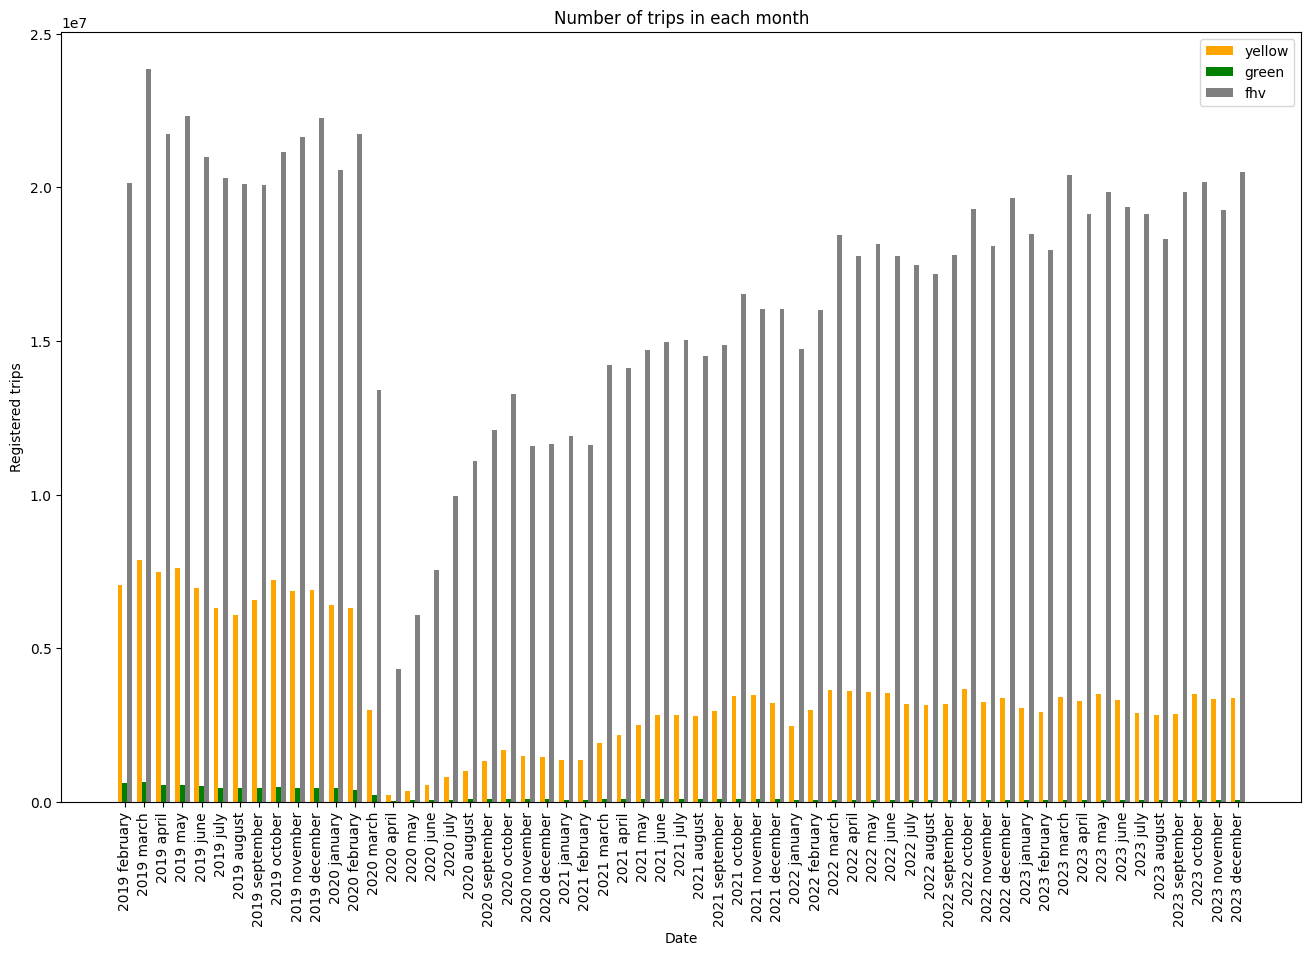

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

WIDTH = 0.25

position = np.arange(59)
plt.figure(figsize=(16, 10))

plt.bar(position - WIDTH, samples_num_monthly.loc['yellow'], width=WIDTH, label='yellow', color='orange')
plt.bar(position, samples_num_monthly.loc['green'], width=WIDTH, label='green', color='green')
plt.bar(position + WIDTH, samples_num_monthly.loc['fhv'], width=WIDTH, label='fhv', color='gray')

plt.ylabel('Registered trips')
plt.xlabel('Date')
plt.title('Number of trips in each month')
plt.xticks(position, samples_num_monthly.columns, rotation='vertical')
plt.legend()

plt.show()